In [1]:
### Figure 3G_H for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy.spatial import distance
import pathlib
import os
from sklearn.decomposition import PCA
np.random.seed(3)


In [2]:
# set data input folder
# download files described in README.md to this folder
data_input_folder = "../"

# set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# Import the Hela DMEM gene level profiles
cp257_dmem_df = pd.read_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS_plate_level_gene_aggregated.csv.gz'))
cp257_dmem_df = cp257_dmem_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Perform principle component analysis & select components representing 70% of the variation from the data set
pca = PCA(n_components=220)
cp257_dmem_df = pd.DataFrame(pca.fit_transform(cp257_dmem_df),index=cp257_dmem_df.index)
cp257_dmem_df = cp257_dmem_df.reset_index()
cp257_dmem_df

,Metadata_Foci_Barcode_MatchedTo_GeneCode,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,217,218,219
0,A1BG,2.067462,2.080719,-3.484430,-0.979624,-1.503884,-1.182713,-0.440247,1.367800,0.982871,...,-0.243274,-0.006887,-0.186198,0.103654,0.451436,0.209876,0.381613,-0.078299,-0.165080,-0.378406
1,A1CF,0.968562,0.840070,0.466684,0.864963,-1.679825,-0.313628,-1.212984,1.205427,0.506140,...,0.025524,0.107418,-0.436950,0.050975,-0.079509,-0.181869,0.253923,-0.001245,0.038765,-0.160960
2,A2M,1.434348,0.357048,-1.977186,-0.535348,-1.679516,1.748084,-0.380783,1.381338,0.158952,...,-0.411814,-0.030721,-0.030568,0.342853,-0.031511,0.250762,0.005863,0.030414,0.205570,0.243238
3,A2ML1,-0.950513,0.557923,1.097103,0.056581,0.734636,0.684325,-0.594020,-0.594505,-0.813102,...,0.148269,0.204885,-0.099316,0.251268,-0.143046,-0.020832,0.073952,-0.145424,-0.041097,0.033275
4,A3GALT2,-9.055565,0.370690,0.900755,-0.721457,1.851619,-0.999845,1.332737,-1.072631,-2.356602,...,-0.227636,0.381709,-0.113279,0.326034,0.208982,0.056044,0.092215,0.117003,-0.412537,-0.061393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,ZYG11B,-0.752256,-0.157841,-0.000918,0.300293,-0.433161,0.275010,-0.179328,0.323585,-1.464730,...,0.282829,-0.207962,0.072458,0.344877,-0.123697,0.303207,0.207287,-0.159863,-0.179341,-0.184674
20390,ZYX,5.618798,-1.785789,-0.599658,2.062653,-0.083850,0.663985,0.917986,-0.714370,-0.826682,...,0.191515,0.002999,-0.522911,0.086181,0.104229,0.193252,0.125018,0.220990,-0.071588,0.352090
20391,ZZEF1,-10.689731,2.648182,2.526616,1.697379,-2.748222,1.175041,1.188476,0.655047,-0.417217,...,-0.049335,-0.264094,0.227850,-0.676650,0.197300,0.071919,-0.150285,-0.220608,-0.071749,0.174525
20392,ZZZ3,4.262581,-0.039106,-1.979051,-0.128575,-1.282383,-0.504919,-0.614778,0.641390,1.787471,...,0.287566,-0.389196,-0.079020,-0.029317,-0.348837,0.189250,-0.208136,0.092502,-0.146833,-0.523700


In [4]:
# How much of the Hela dmem data set variation is represented in the PCA components
x = list(pca.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
print('Explained variance ratio :', y[219])


Explained variance ratio : 0.6995402278913595


In [5]:
# Import the Hela HPLM gene level profiles
cp257_hplm_df = pd.read_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___HPLM___ALLWELLS_gene_aggregated.csv.gz'))
cp257_hplm_df = cp257_hplm_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Perform principle component analysis & select components representing 70% of the variation from the data set
pca_hplm = PCA(n_components=160)
cp257_hplm_df = pd.DataFrame(pca_hplm.fit_transform(cp257_hplm_df),index=cp257_hplm_df.index)
cp257_hplm_df = cp257_hplm_df.reset_index()
cp257_hplm_df

,Metadata_Foci_Barcode_MatchedTo_GeneCode,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,A1BG,1.631312,1.613159,3.014042,-1.749491,0.747655,-2.263314,1.621407,0.580308,0.266791,...,0.313668,-0.268931,0.210979,0.235359,-0.499601,0.496685,-0.125315,0.197611,0.186434,-0.007435
1,A1CF,2.979367,3.591269,-0.149918,-1.388088,0.091967,0.088882,-0.042084,0.026289,0.206233,...,0.006547,0.356110,-0.026275,-0.303534,-0.131270,0.169334,-0.141920,0.025104,0.081968,0.080108
2,A2M,1.769034,-1.775785,-1.059892,-4.576765,-0.036606,2.896833,1.086686,-0.909597,-1.201923,...,0.208845,0.052339,-0.081002,-0.105775,-0.344650,-0.180084,0.031382,0.013868,0.145338,0.280151
3,A2ML1,-0.131835,-1.229280,3.069760,0.342828,-0.749012,-0.735887,-0.533491,-0.871848,-0.940486,...,0.228554,-0.144555,-0.187264,-0.173752,-0.305608,-0.366595,-0.113721,-0.184683,-0.118339,-0.061707
4,A3GALT2,-2.508585,-1.732827,-0.752530,0.367364,-3.609211,1.289250,1.666406,0.514052,-1.400885,...,-0.125581,-0.114508,-0.215748,0.258484,-0.168842,-0.021000,-0.350556,0.161880,0.259253,0.231430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,ZYG11B,-3.072808,-0.710320,1.715157,2.765976,-0.116362,1.786641,-0.820158,0.481661,-0.383478,...,-0.131547,0.158195,-0.189365,0.050588,-0.080944,-0.277724,-0.033139,0.036956,0.068034,-0.018740
20389,ZYX,4.615455,-1.454654,-1.947446,1.807662,0.263941,0.873602,-0.048001,-2.130388,0.345599,...,0.104694,0.060540,-0.721822,-0.235866,0.117855,0.124955,-0.535363,0.087598,-0.126282,-0.096939
20390,ZZEF1,0.282210,-1.205877,-0.216085,-0.449842,0.759901,0.027792,0.541470,-2.138158,0.591552,...,-0.018847,-0.059721,-0.092026,-0.106562,-0.089457,0.429333,0.418939,-0.257426,0.177467,-0.330205
20391,ZZZ3,-5.779272,2.014191,1.894756,-3.167550,0.133769,1.853804,1.883916,-1.265890,1.750458,...,0.178283,0.221483,0.142993,-0.255886,-0.216544,0.040485,-0.362541,-0.055474,-0.629799,-0.313618


In [6]:
# How much of the Hela hplm data set variation is represented in the PCA components
x = list(pca_hplm.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
print('Explained variance ratio :', y[159])


Explained variance ratio : 0.6991386465901817


In [7]:
def coupled_heatmap(profiel_df_1,profiel_df_2,gene_set,genes,font_scale = 3.5):
    
    # Clustered based on the profiel_df_1 arm first
    genes_lst = genes.split('\t')
    genes_df =  profiel_df_1[profiel_df_1['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genes_lst)]
    genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
    
    # Clustered based on the profiel_df_1 arm first
    data = genes_profiles.T
    corr = data.corr()

    ax = sns.clustermap(
        corr, 
        vmin=-1, vmax=1, center=0,
        method = 'ward',
        square=True,
    )

    # Clustered based on the profiel_df_1 arm first
    hplm_gene_list = list(genes_df.Metadata_Foci_Barcode_MatchedTo_GeneCode)

    hplm_cluster_order = ax.dendrogram_row.reordered_ind
    hplm_cluster_list = [hplm_gene_list[i] for i in hplm_cluster_order]

    dmem_gene_df =  profiel_df_2[profiel_df_2['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(hplm_cluster_list)]
    dmem_gene_profiles = dmem_gene_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
    dmem_gene_profiles = dmem_gene_profiles.reindex(hplm_cluster_list)
    hplm_gene_profiles = genes_profiles.reindex(hplm_cluster_list)

    hplm_data = hplm_gene_profiles.T
    hplm_corr = hplm_data.corr()

    dmem_data = dmem_gene_profiles.T
    dmem_corr = dmem_data.corr()
    len(hplm_corr)#.iloc[0,10]
    corr = dmem_corr.copy()
    for i in range(len(hplm_corr)):
        for j in range(len(hplm_corr)):
            if i > j:
                corr.iat[i,j] = hplm_corr.iat[i,j]
            elif i < j:
                corr.iat[i,j] = dmem_corr.iat[i,j]
            elif i == j:
                corr.iat[i,j] = 1
    
    file_name = f'cp257_median_plate_level_profile_heatmap_clustering_gene_hits_{gene_set}.png'
    plt.clf()

    fig, ax = plt.subplots(figsize=(30, 30))
    sns.set(font_scale=font_scale,rc={'figure.figsize':(30,30)})

    ax = sns.heatmap(
                corr, 
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(250, 10 ,s=100,l=35, n=100),#sns.diverging_palette(220, 10, n=200),
                linewidth = 1,
                linecolor='white',
                square=True,
                cbar=False,
                cbar_kws={"shrink": .76}
    )
    ax.set_xticklabels(
                ax.get_xticklabels(),
                rotation=90,
                horizontalalignment='right'
    )
    ax.yaxis.tick_right()
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='left')
    #ax.set_title(title,fontsize=30)

    plt.tight_layout()
    #fig = ax.get_figure()

    output_file = pathlib.Path(f"{file_name}")
    plt.show()
    fig.savefig(os.path.join(output_folder,output_file),dpi=300)




    

<Figure size 1000x1000 with 0 Axes>

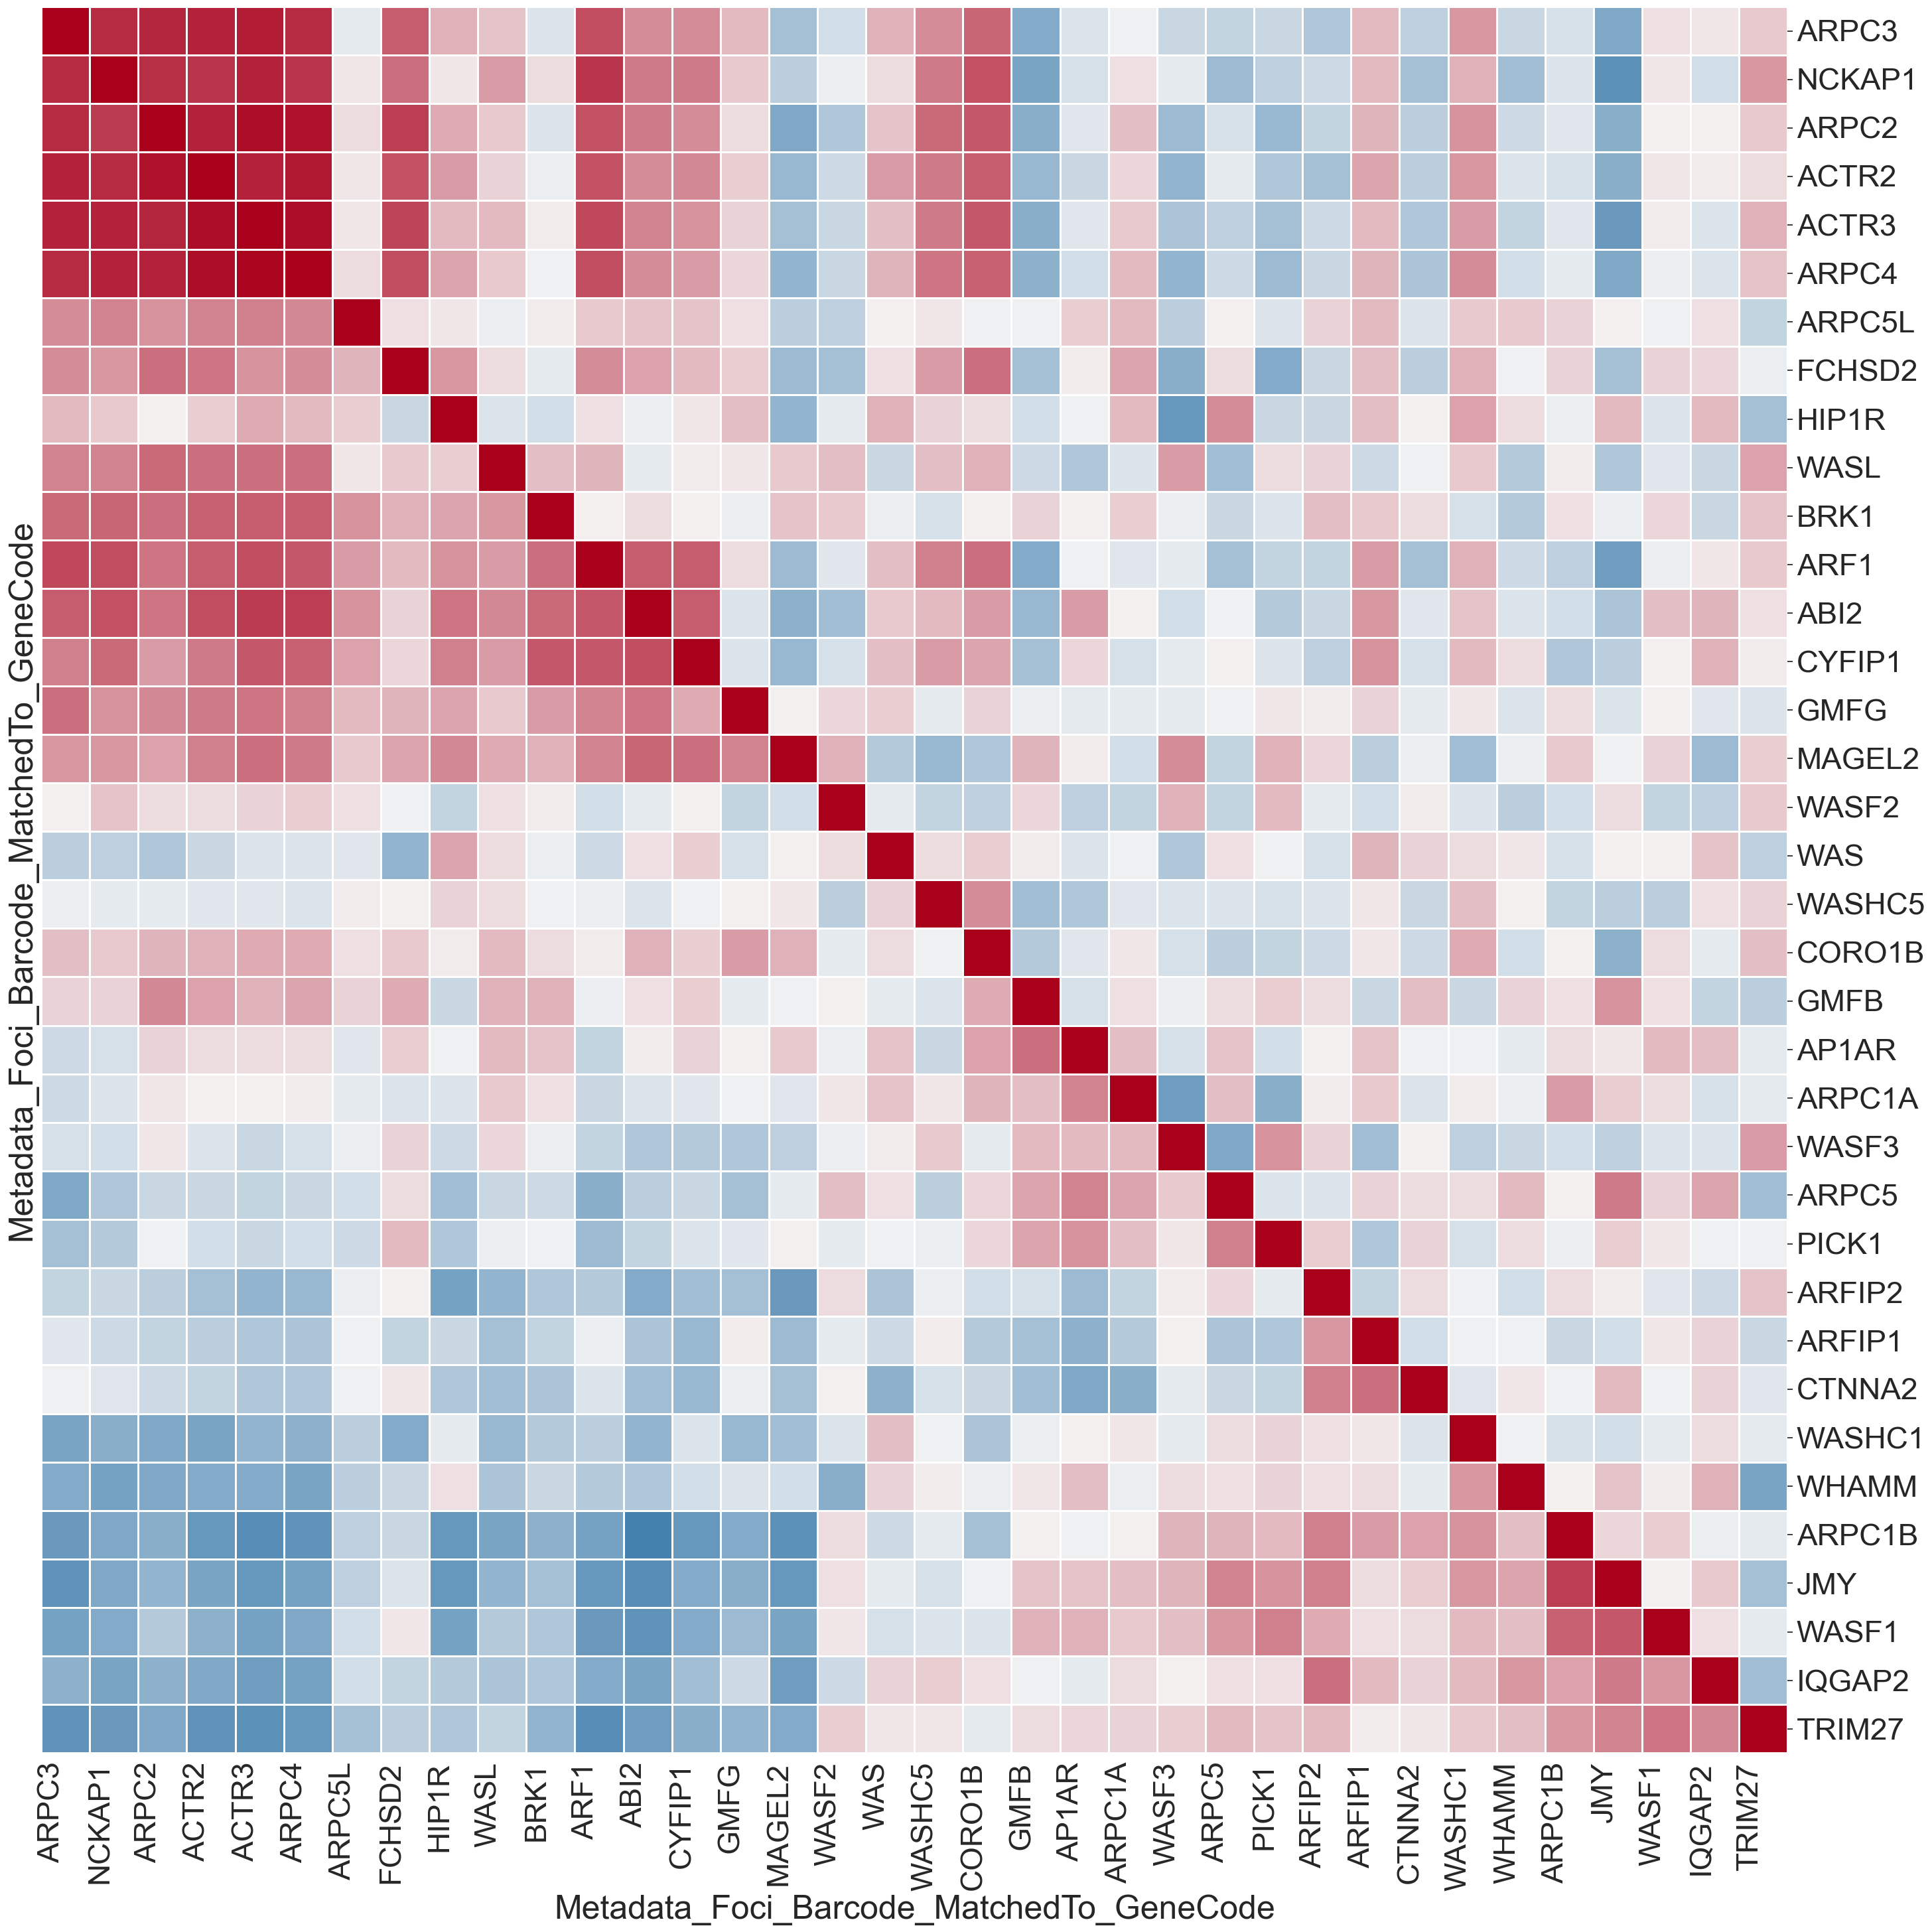

In [10]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_ARP2_3_COMPLEX_MEDIATED_ACTIN_NUCLEATION_HPLM_cluster'
genes = 'WASHC1	ARPC5	ARPC4	ARPC3	ARPC1B	ACTR3	ACTR2	ARPC2	ABI2	WASF2	ARPC1A	NCKAP1	IQGAP2	WASF3	WHAMM	DNAI3	JMY	CTNNA2	CYFIP1	ARFIP2	ARFIP1	GMFB	WHAMMP3	WASH3P	ARF1	MAGEL2	AP1AR	BRK1	CORO1B	TRIM27	WASH6P	WAS	ARPC5L	WASF1	WASL	HIP1R	PICK1	GMFG	FCHSD2	WASHC5'
coupled_heatmap(cp257_hplm_df,cp257_dmem_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

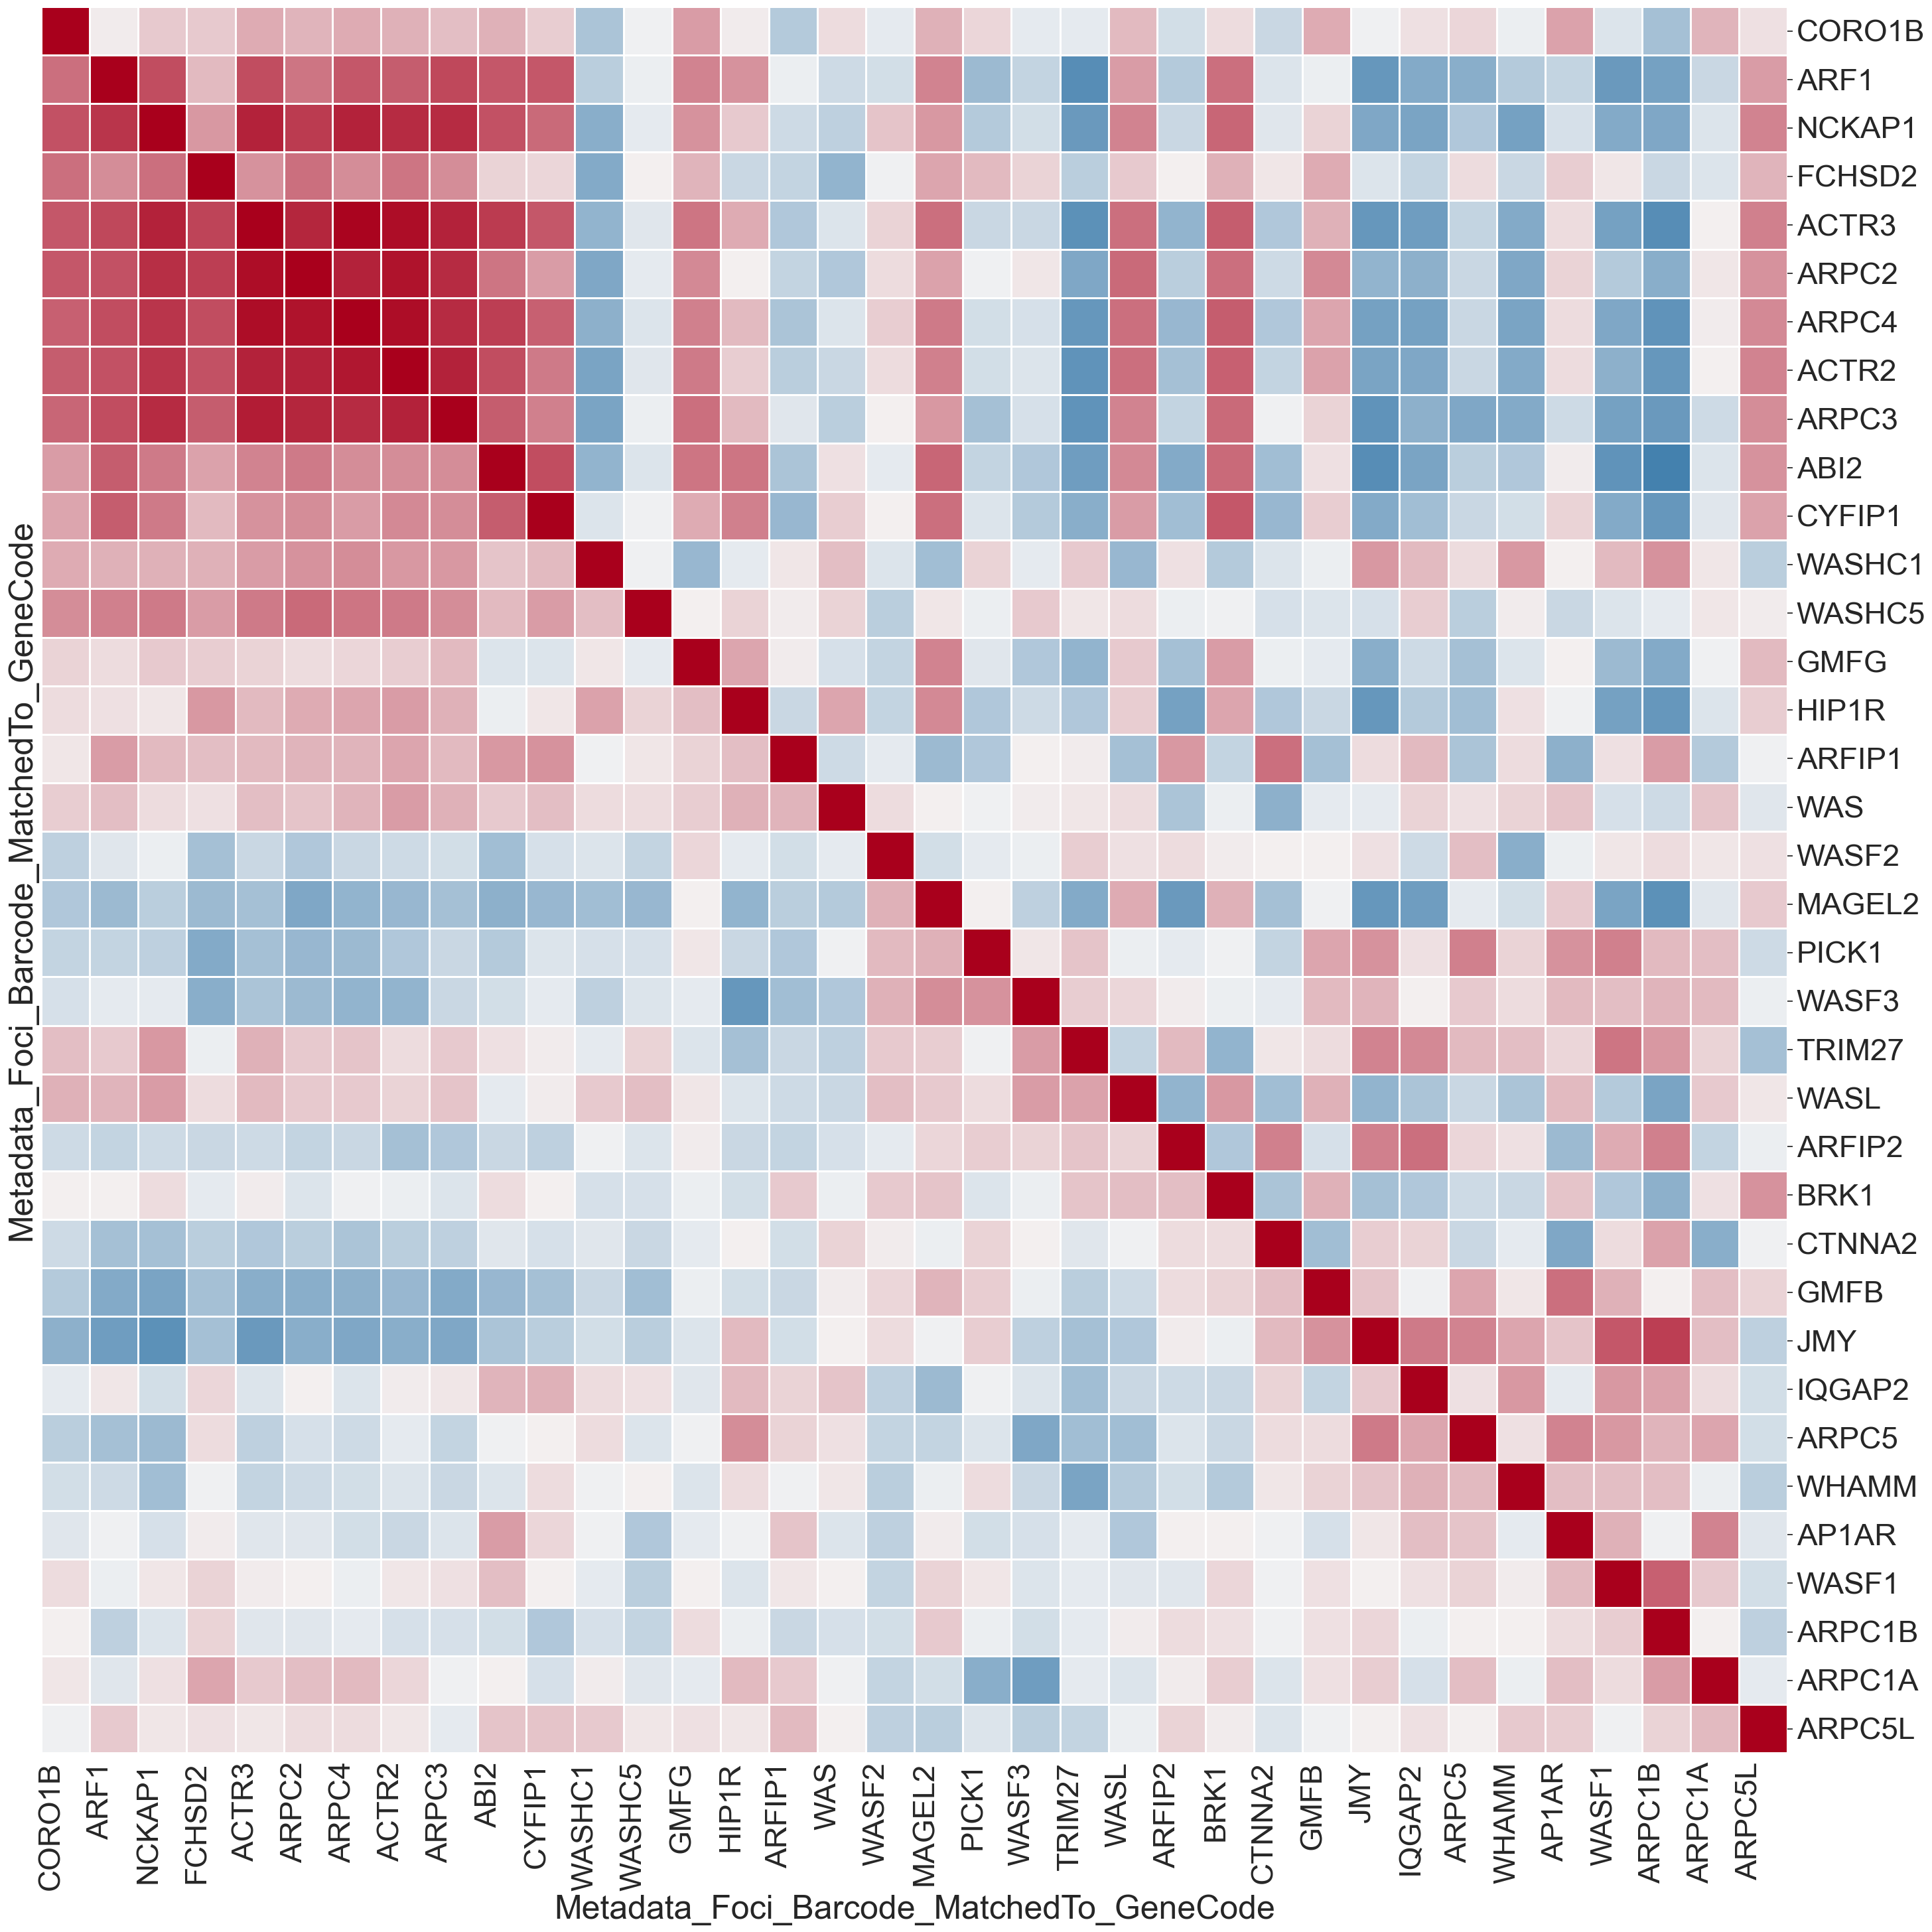

In [9]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_ARP2_3_COMPLEX_MEDIATED_ACTIN_NUCLEATION_DMEM_cluster'
genes = 'WASHC1	ARPC5	ARPC4	ARPC3	ARPC1B	ACTR3	ACTR2	ARPC2	ABI2	WASF2	ARPC1A	NCKAP1	IQGAP2	WASF3	WHAMM	DNAI3	JMY	CTNNA2	CYFIP1	ARFIP2	ARFIP1	GMFB	WHAMMP3	WASH3P	ARF1	MAGEL2	AP1AR	BRK1	CORO1B	TRIM27	WASH6P	WAS	ARPC5L	WASF1	WASL	HIP1R	PICK1	GMFG	FCHSD2	WASHC5'
coupled_heatmap(cp257_dmem_df,cp257_hplm_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

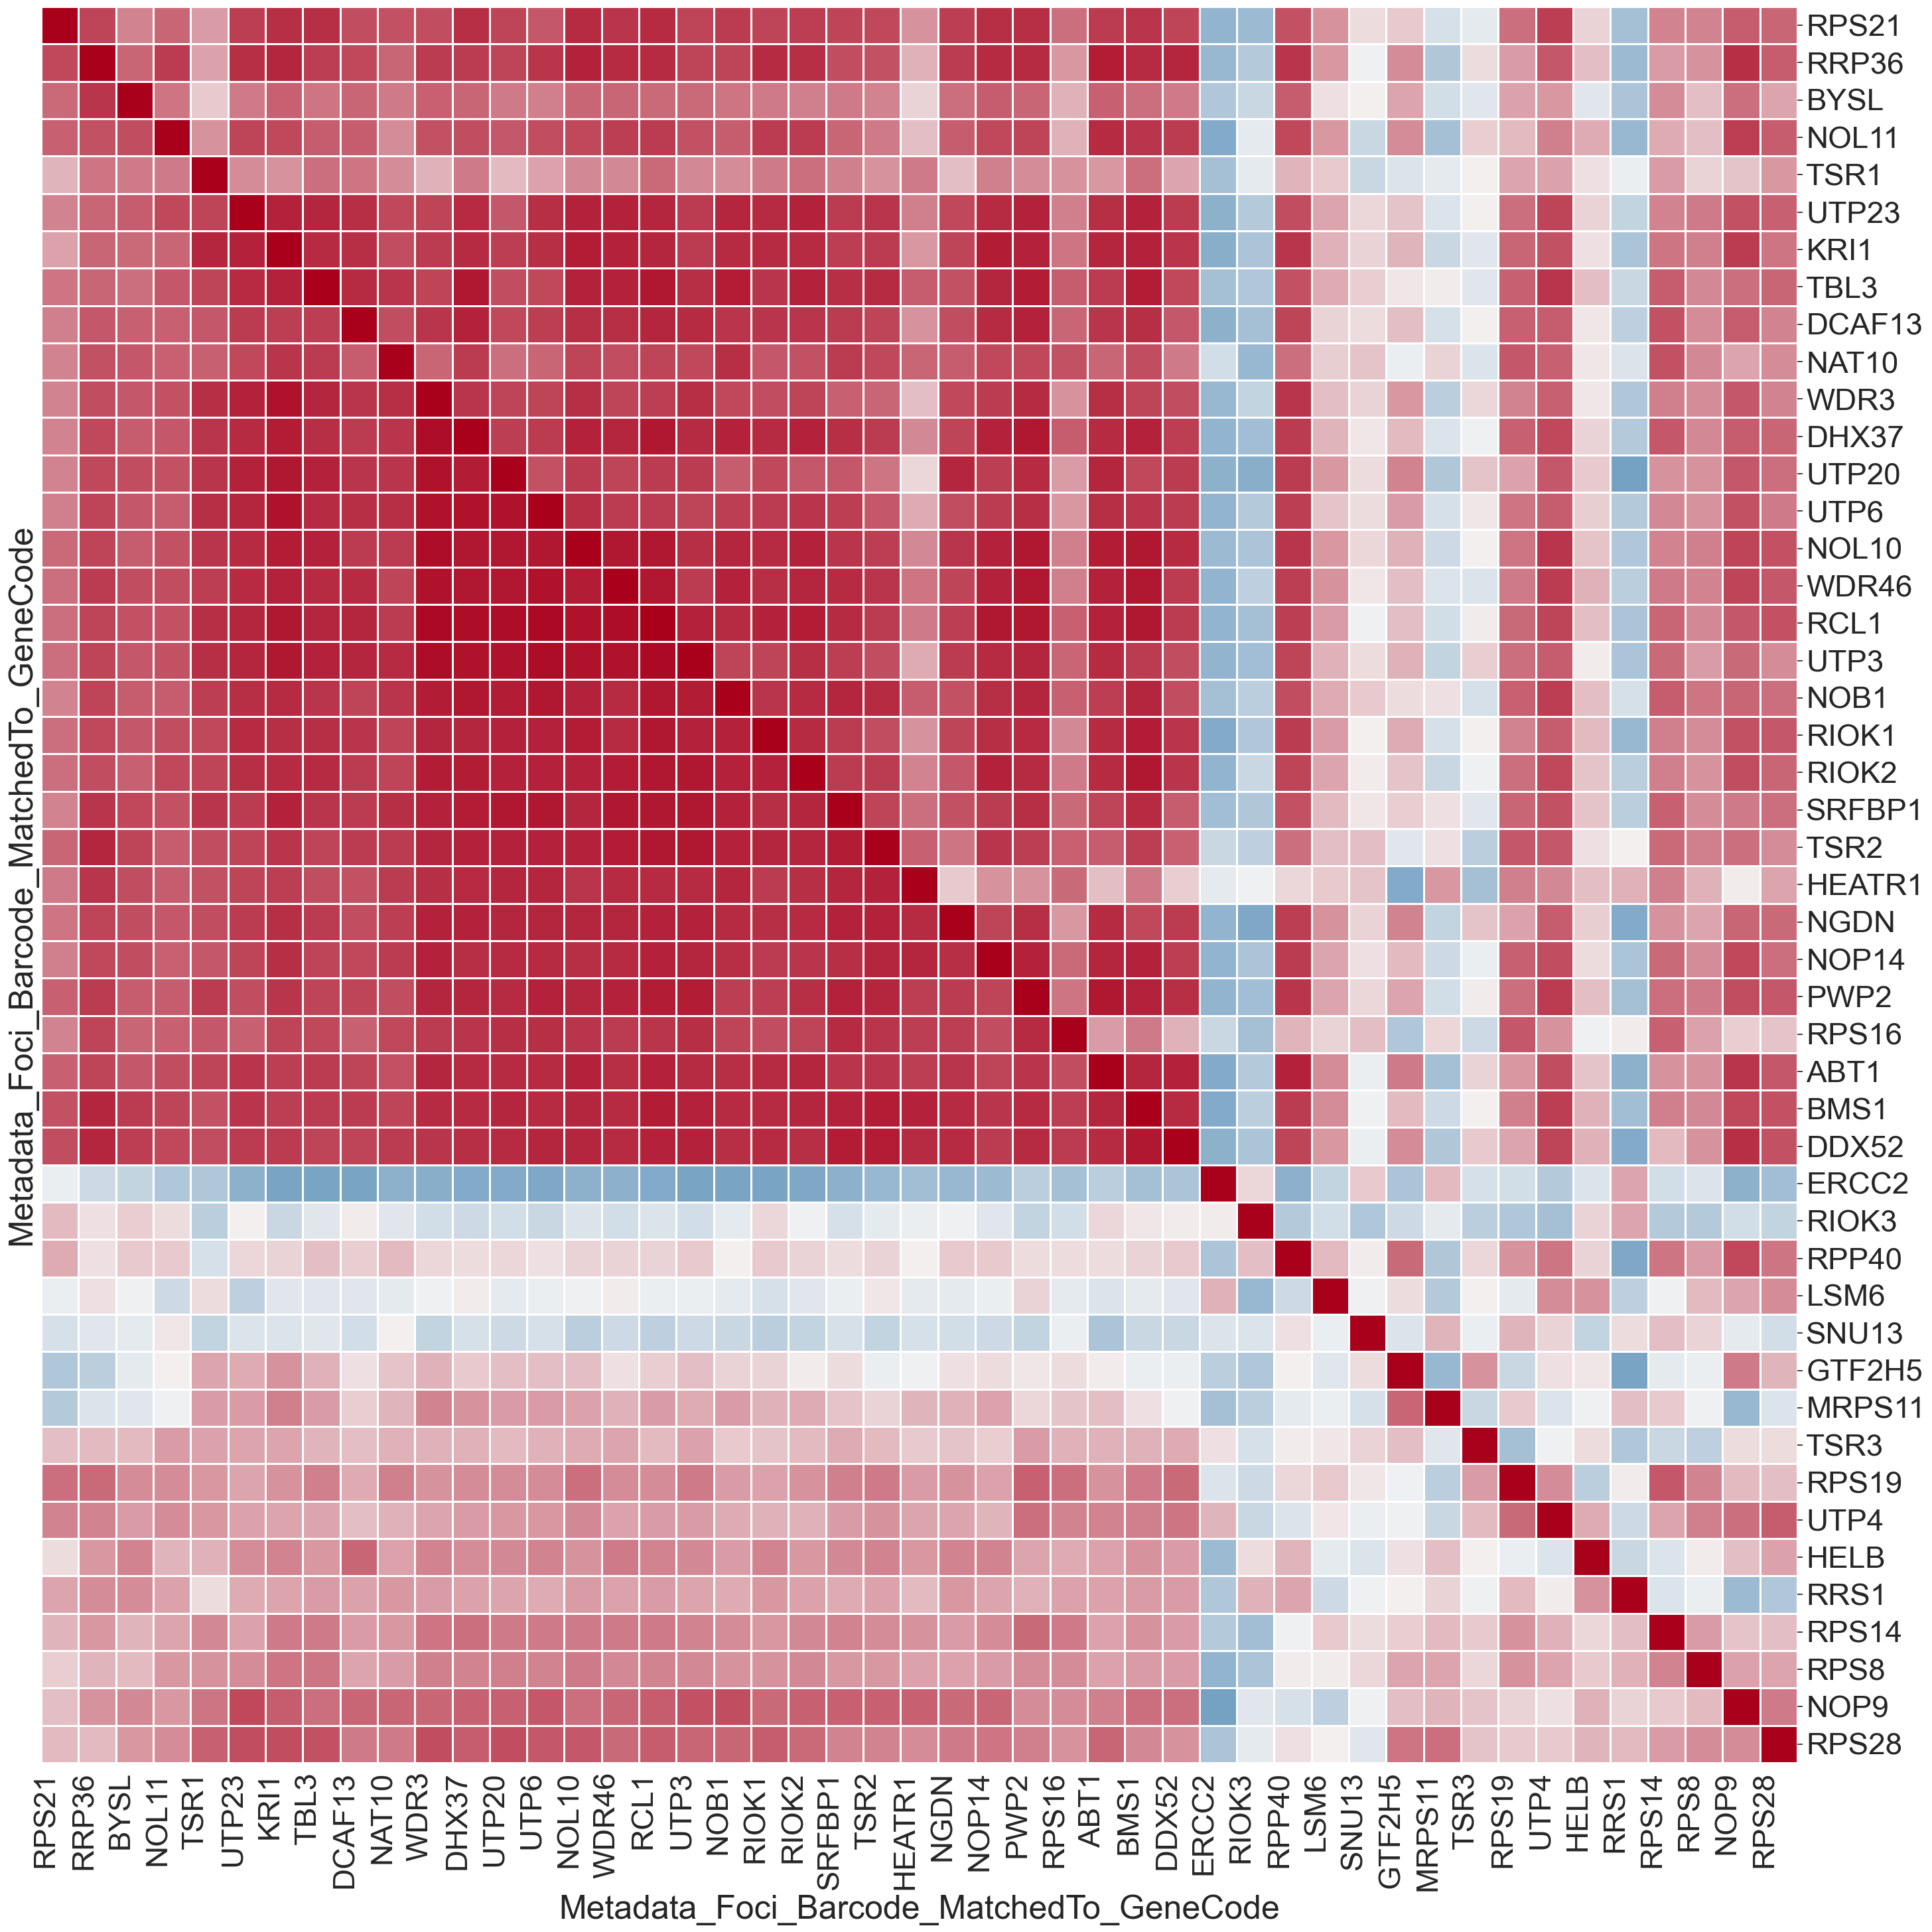

In [11]:
gene_set = 'GOBP_MATURATION_OF_SSU_RRNA_HPLM_cluster'
genes = 'RCL1	ENSG00000275464	TBL3	RPP40	WDR3	DDX52	LSM6	TSR3	SRFBP1	NOP9	ERCC2	RRS1	DCAF13	NOL11	NGDN	UTP25	UTP20	NOB1	ABT1	GTF2H5	SNU13	HEATR1	NAT10	TSR1	RIOK2	UTP6	UTP3	DHX37	PWP2	RPS8	RPS14	RPS16	RPS19	RPS21	RPS28	MRPS11	KRI1	BYSL	NOL10	RIOK1	UTP23	UTP4	SLX9	NOP14	RIOK3	RRP36	TSR2	WDR46	HELB	BMS1'
coupled_heatmap(cp257_hplm_df,cp257_dmem_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

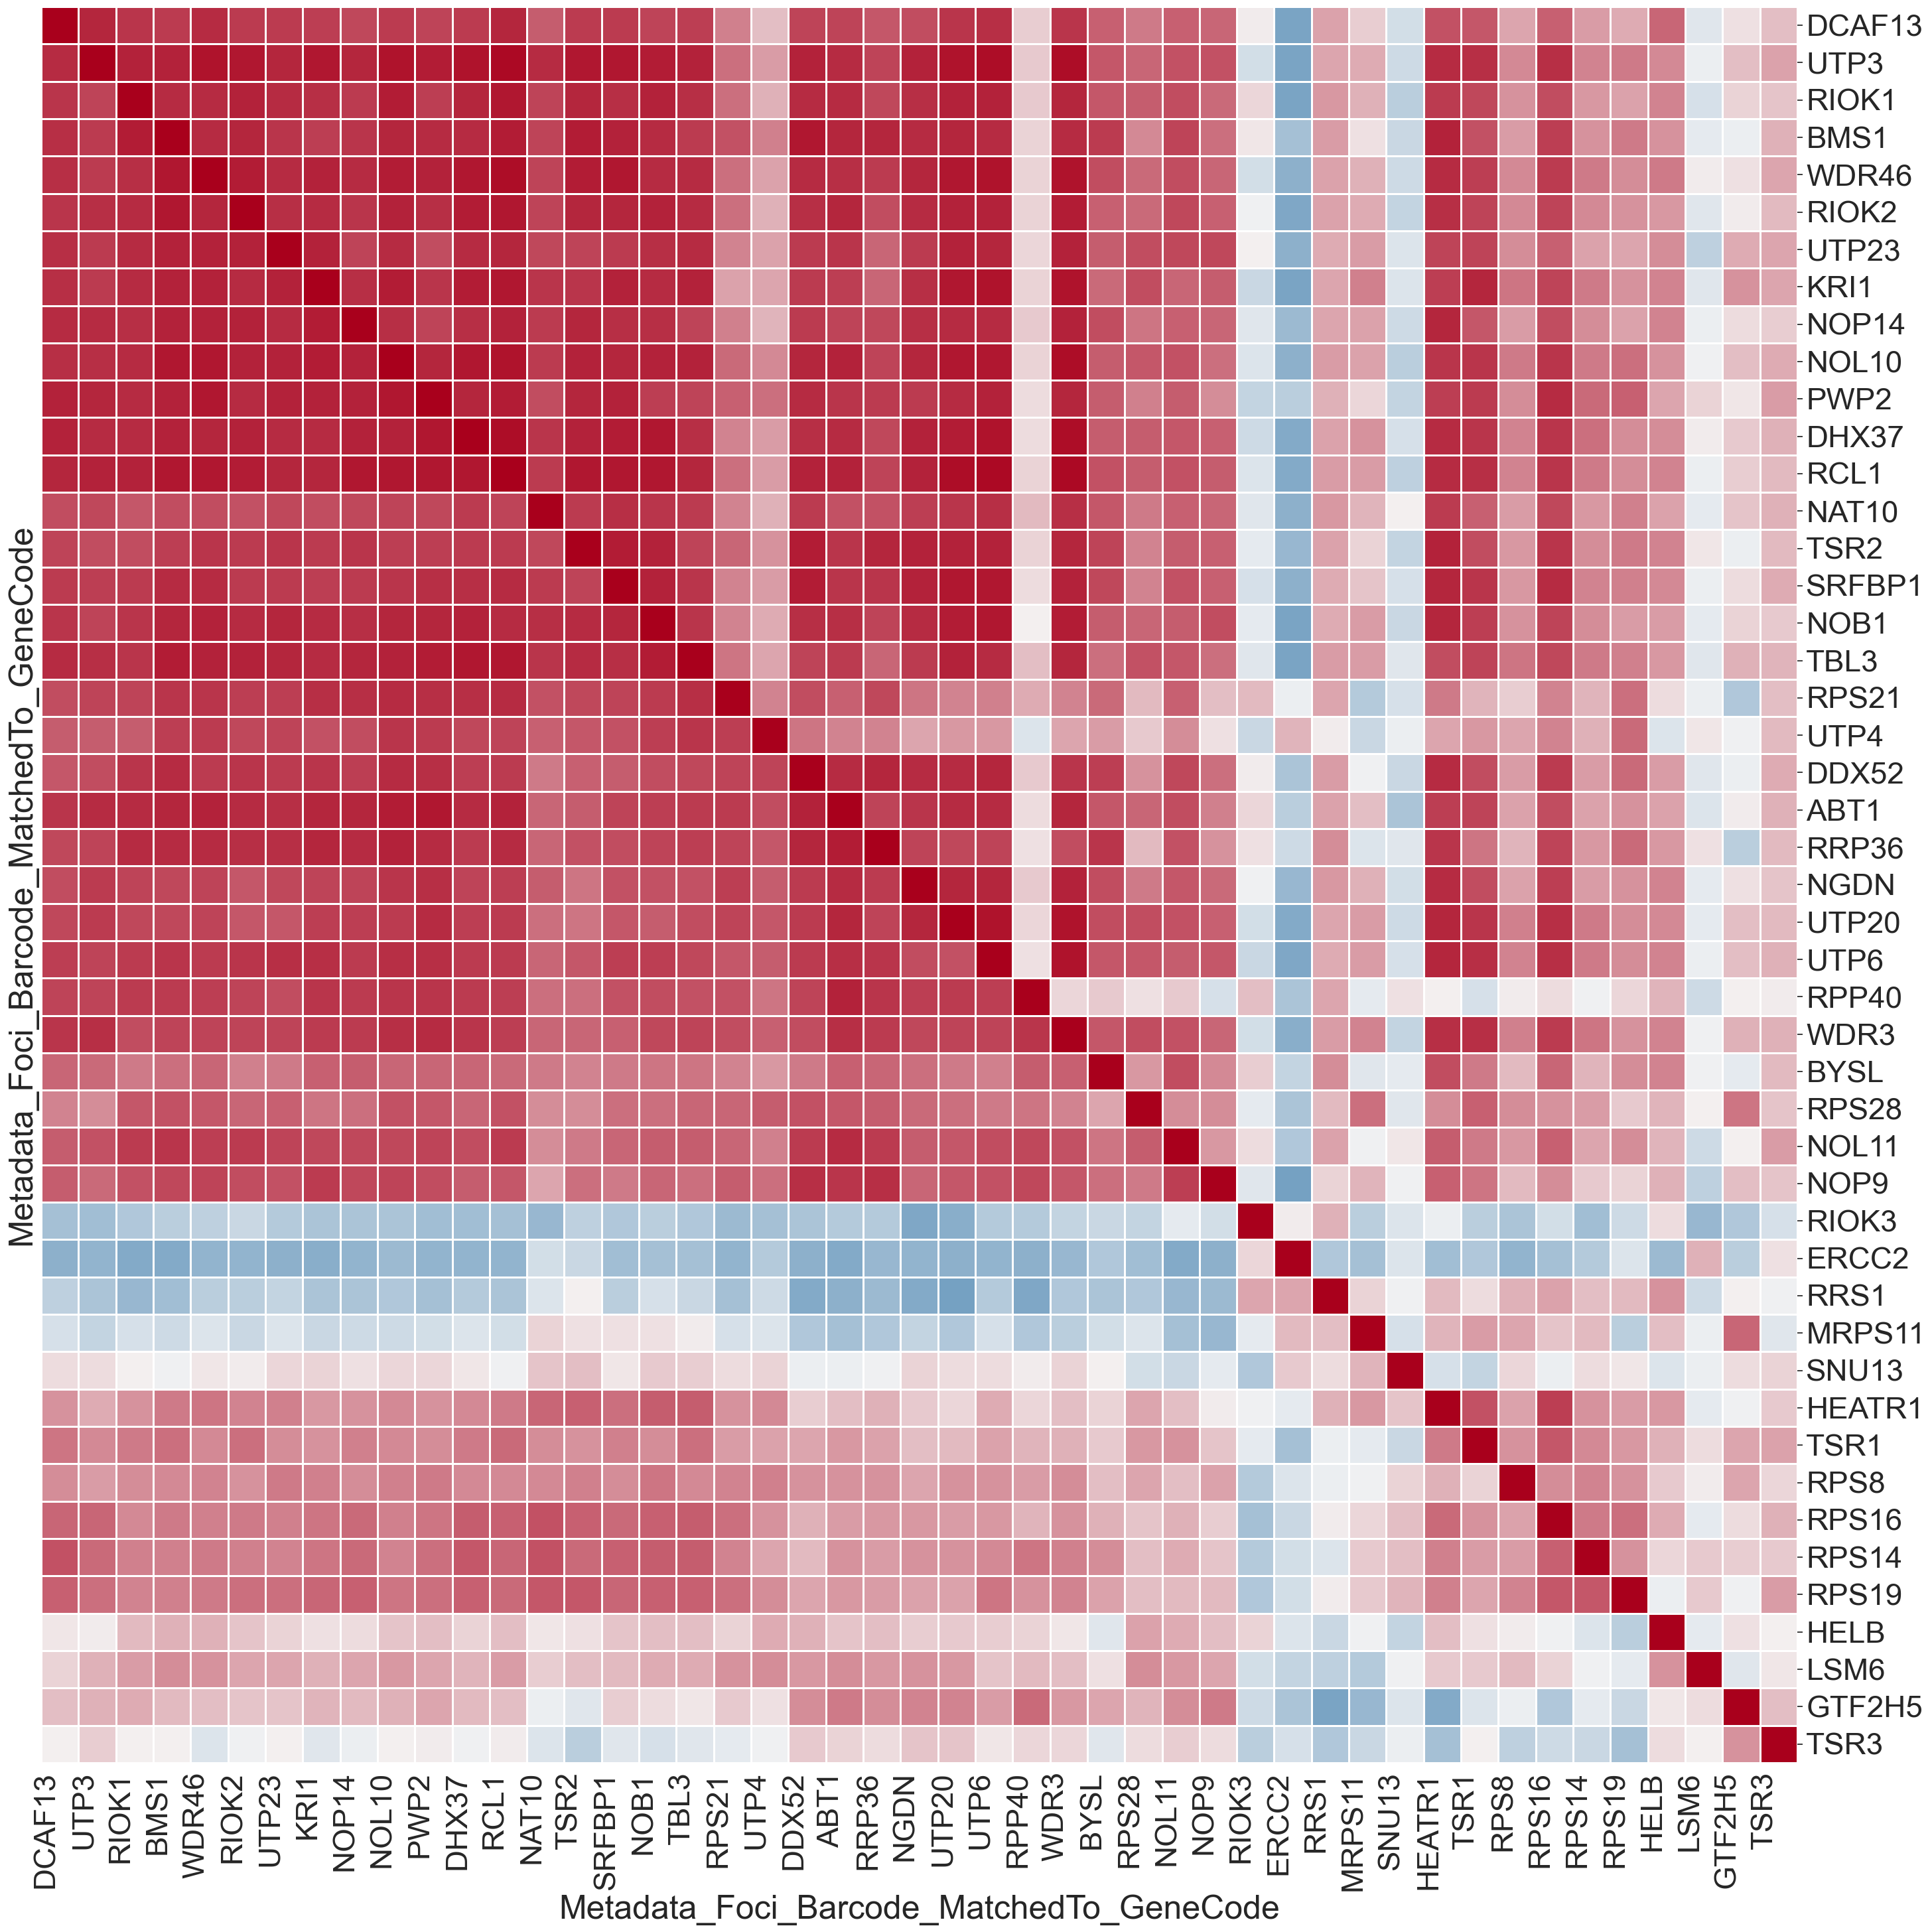

In [12]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_MATURATION_OF_SSU_RRNA_DMEM_cluster'
genes = 'RCL1	ENSG00000275464	TBL3	RPP40	WDR3	DDX52	LSM6	TSR3	SRFBP1	NOP9	ERCC2	RRS1	DCAF13	NOL11	NGDN	UTP25	UTP20	NOB1	ABT1	GTF2H5	SNU13	HEATR1	NAT10	TSR1	RIOK2	UTP6	UTP3	DHX37	PWP2	RPS8	RPS14	RPS16	RPS19	RPS21	RPS28	MRPS11	KRI1	BYSL	NOL10	RIOK1	UTP23	UTP4	SLX9	NOP14	RIOK3	RRP36	TSR2	WDR46	HELB	BMS1'
coupled_heatmap(cp257_dmem_df,cp257_hplm_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

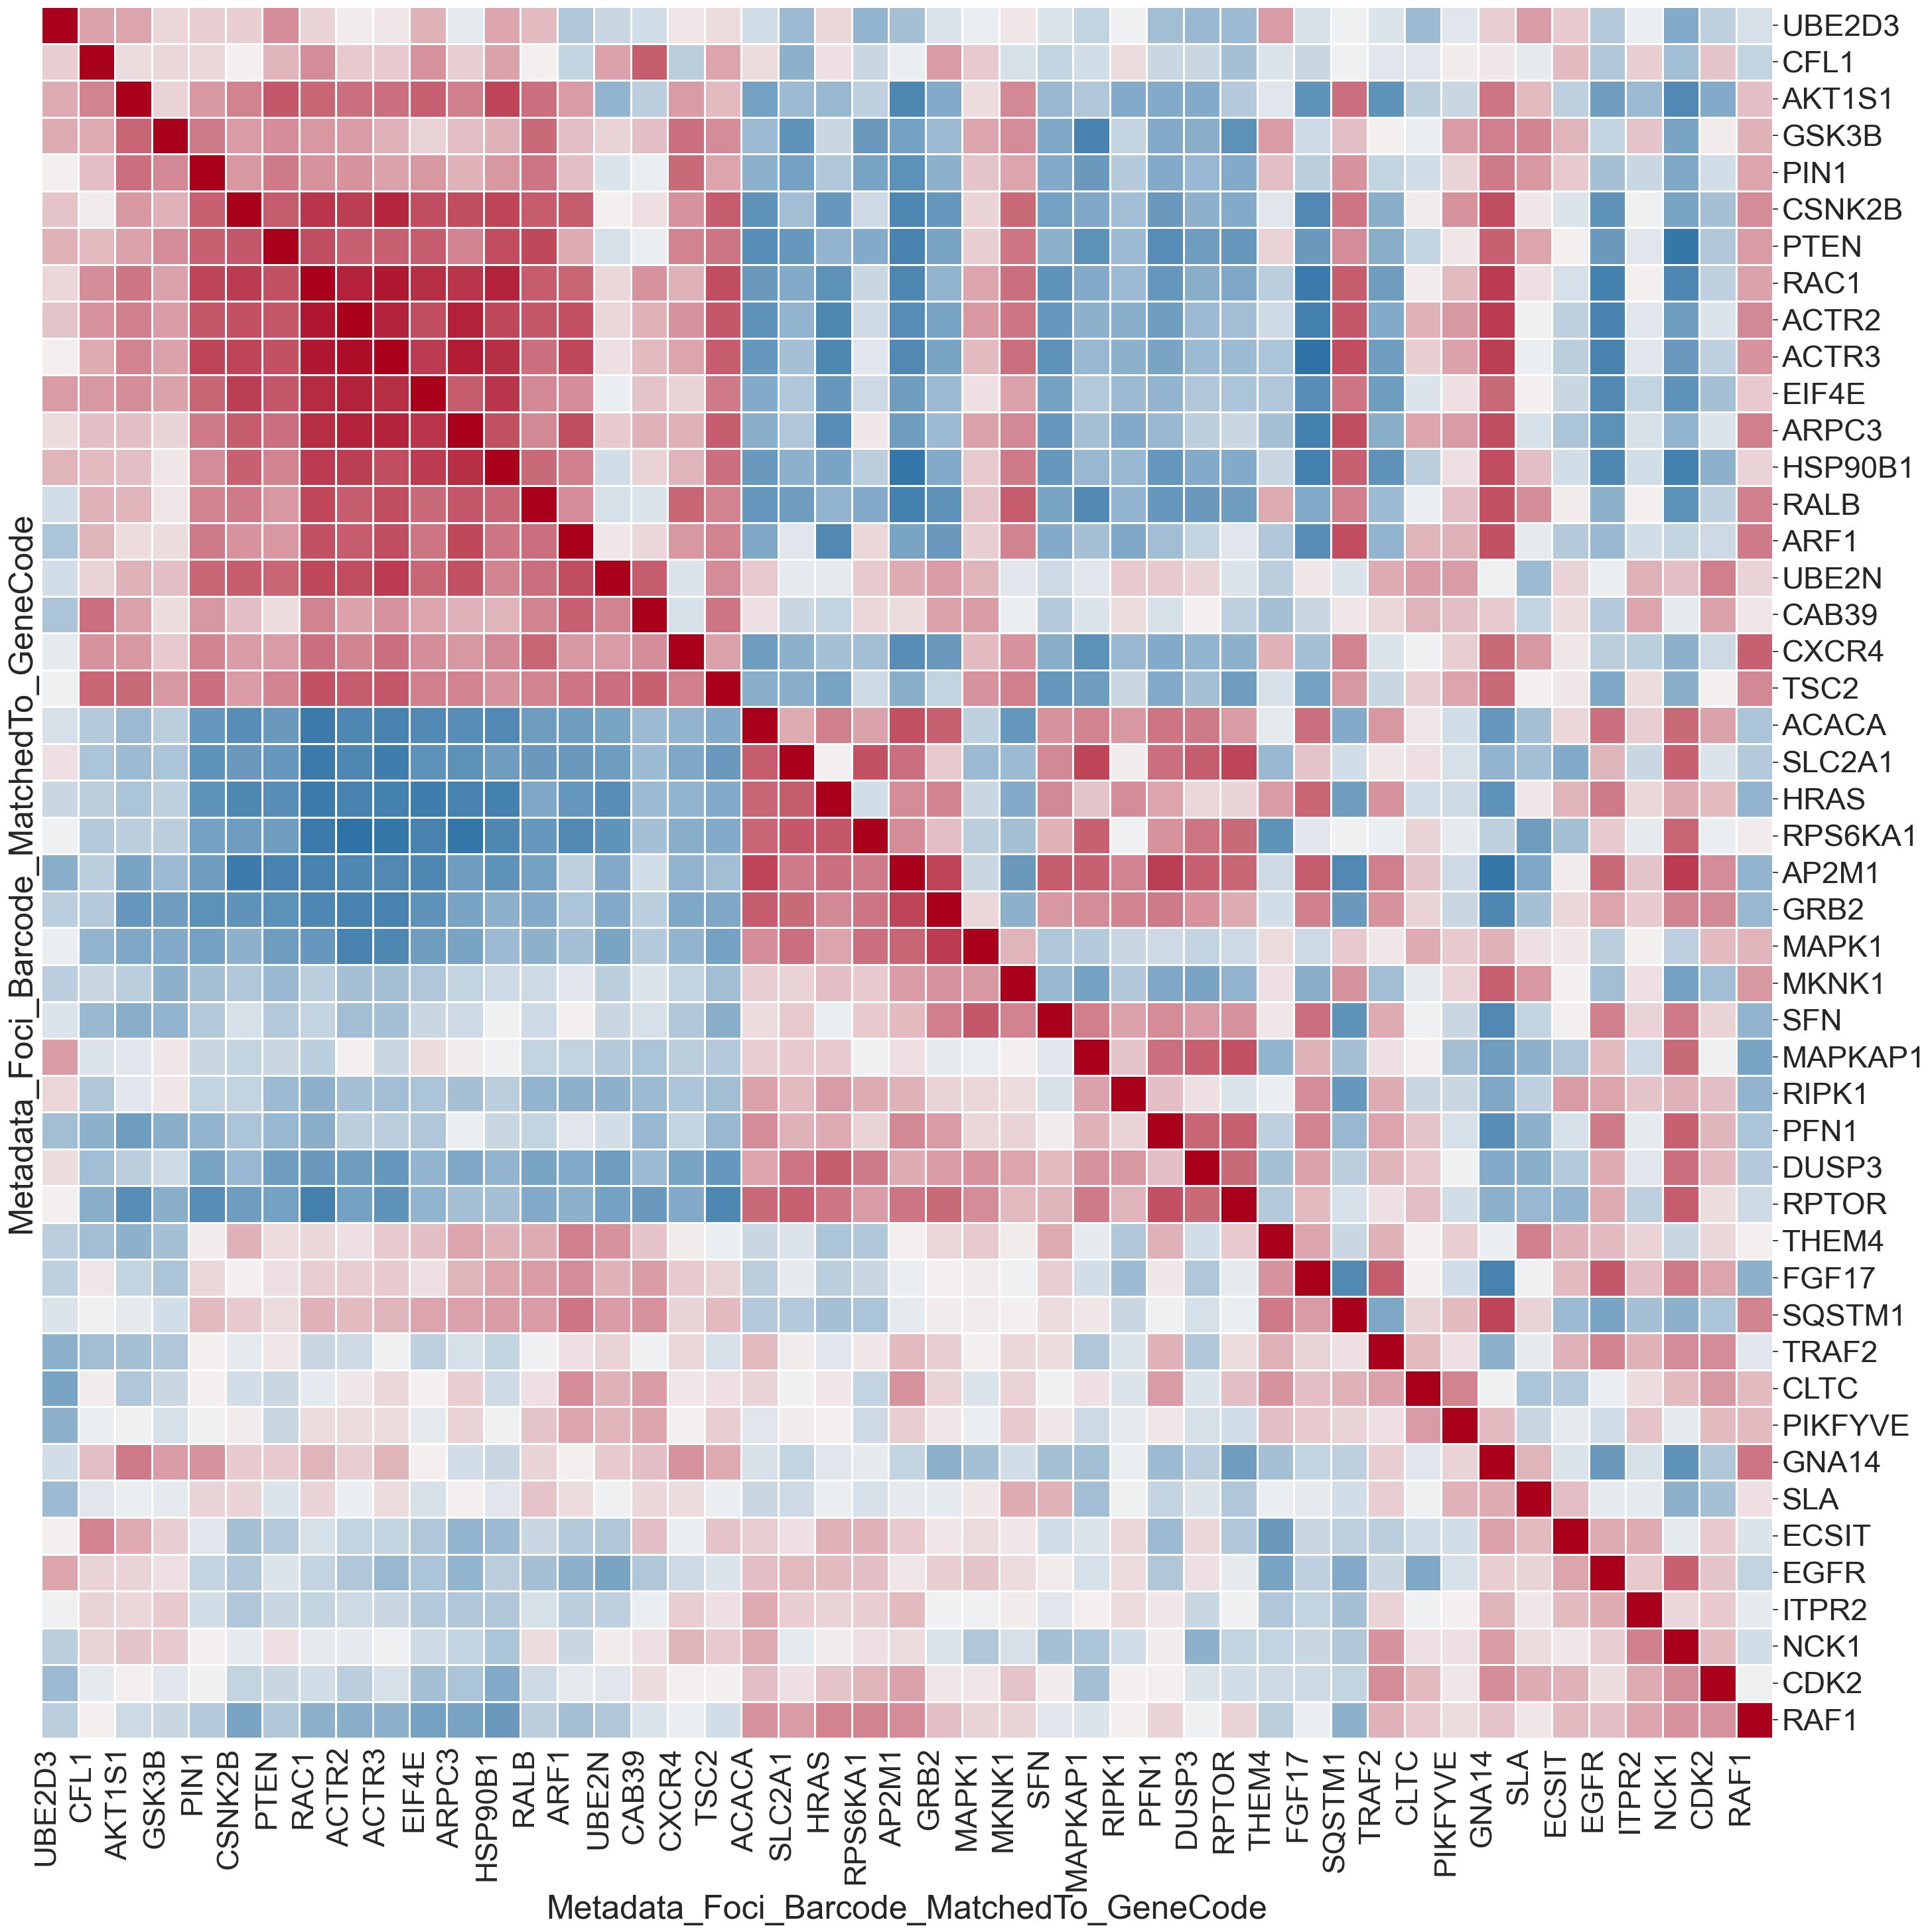

In [13]:
# Clustered based on the HPLM arm first
gene_set = 'pi3k_akt_mtor_signaling_HPLM_cluster'
genes = 'AP2M1	RAC1	ACTR3	ACTR2	HSP90B1	CSNK2B	CFL1	EIF4E	CAB39	GRB2	ARPC3	PTEN	RPTOR	SLC2A1	UBE2N	PIKFYVE	ARF1	MAPKAP1	TSC2	RALB	GNA14	AKT1S1	CDK2	CLTC	NCK1	ACACA	SQSTM1	PFN1	GSK3B	RIPK1	PIN1	TRAF2	MAPK1	FGF17	RPS6KA1	MKNK1	RAF1	THEM4	ECSIT	UBE2D3	HRAS	DUSP3	SLA	EGFR	SFN	CXCR4	ITPR2'
coupled_heatmap(cp257_hplm_df,cp257_dmem_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

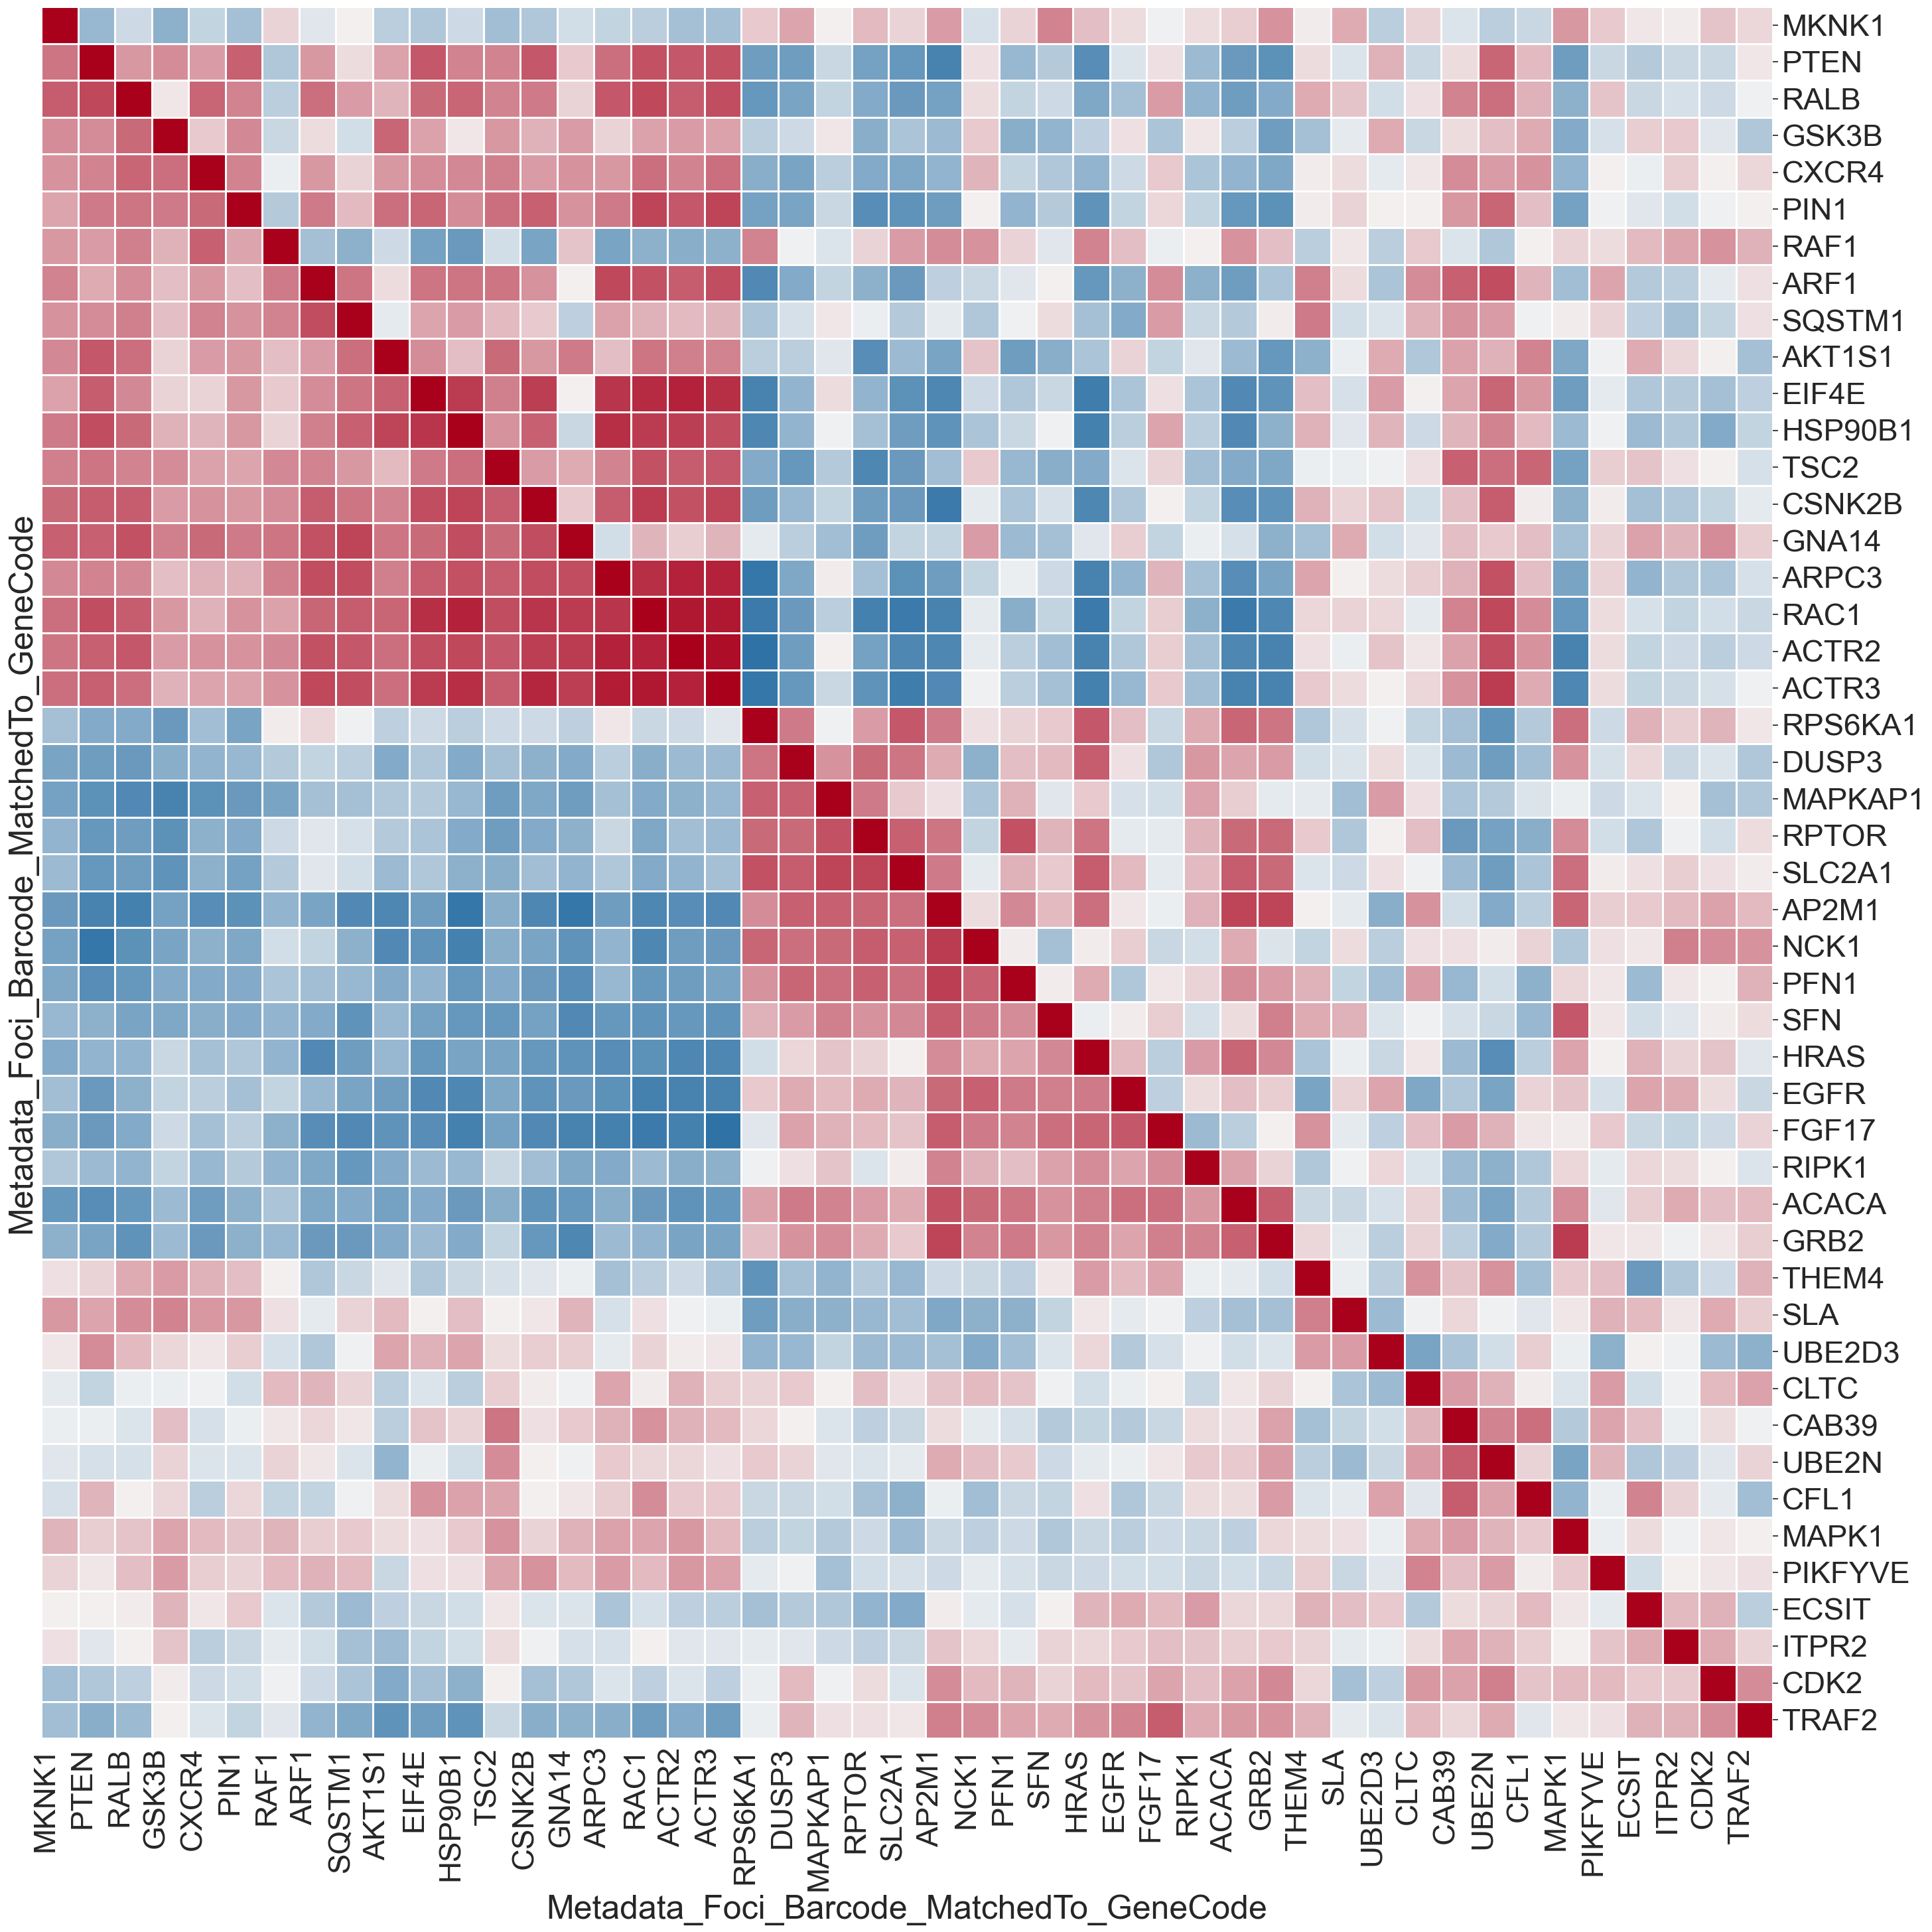

In [14]:
# Clustered based on the DMEM arm first
gene_set = 'pi3k_akt_mtor_signaling_DMEM_cluster'
genes = 'AP2M1	RAC1	ACTR3	ACTR2	HSP90B1	CSNK2B	CFL1	EIF4E	CAB39	GRB2	ARPC3	PTEN	RPTOR	SLC2A1	UBE2N	PIKFYVE	ARF1	MAPKAP1	TSC2	RALB	GNA14	AKT1S1	CDK2	CLTC	NCK1	ACACA	SQSTM1	PFN1	GSK3B	RIPK1	PIN1	TRAF2	MAPK1	FGF17	RPS6KA1	MKNK1	RAF1	THEM4	ECSIT	UBE2D3	HRAS	DUSP3	SLA	EGFR	SFN	CXCR4	ITPR2'
coupled_heatmap(cp257_dmem_df,cp257_hplm_df,gene_set,genes,3)

<Figure size 1000x1000 with 0 Axes>

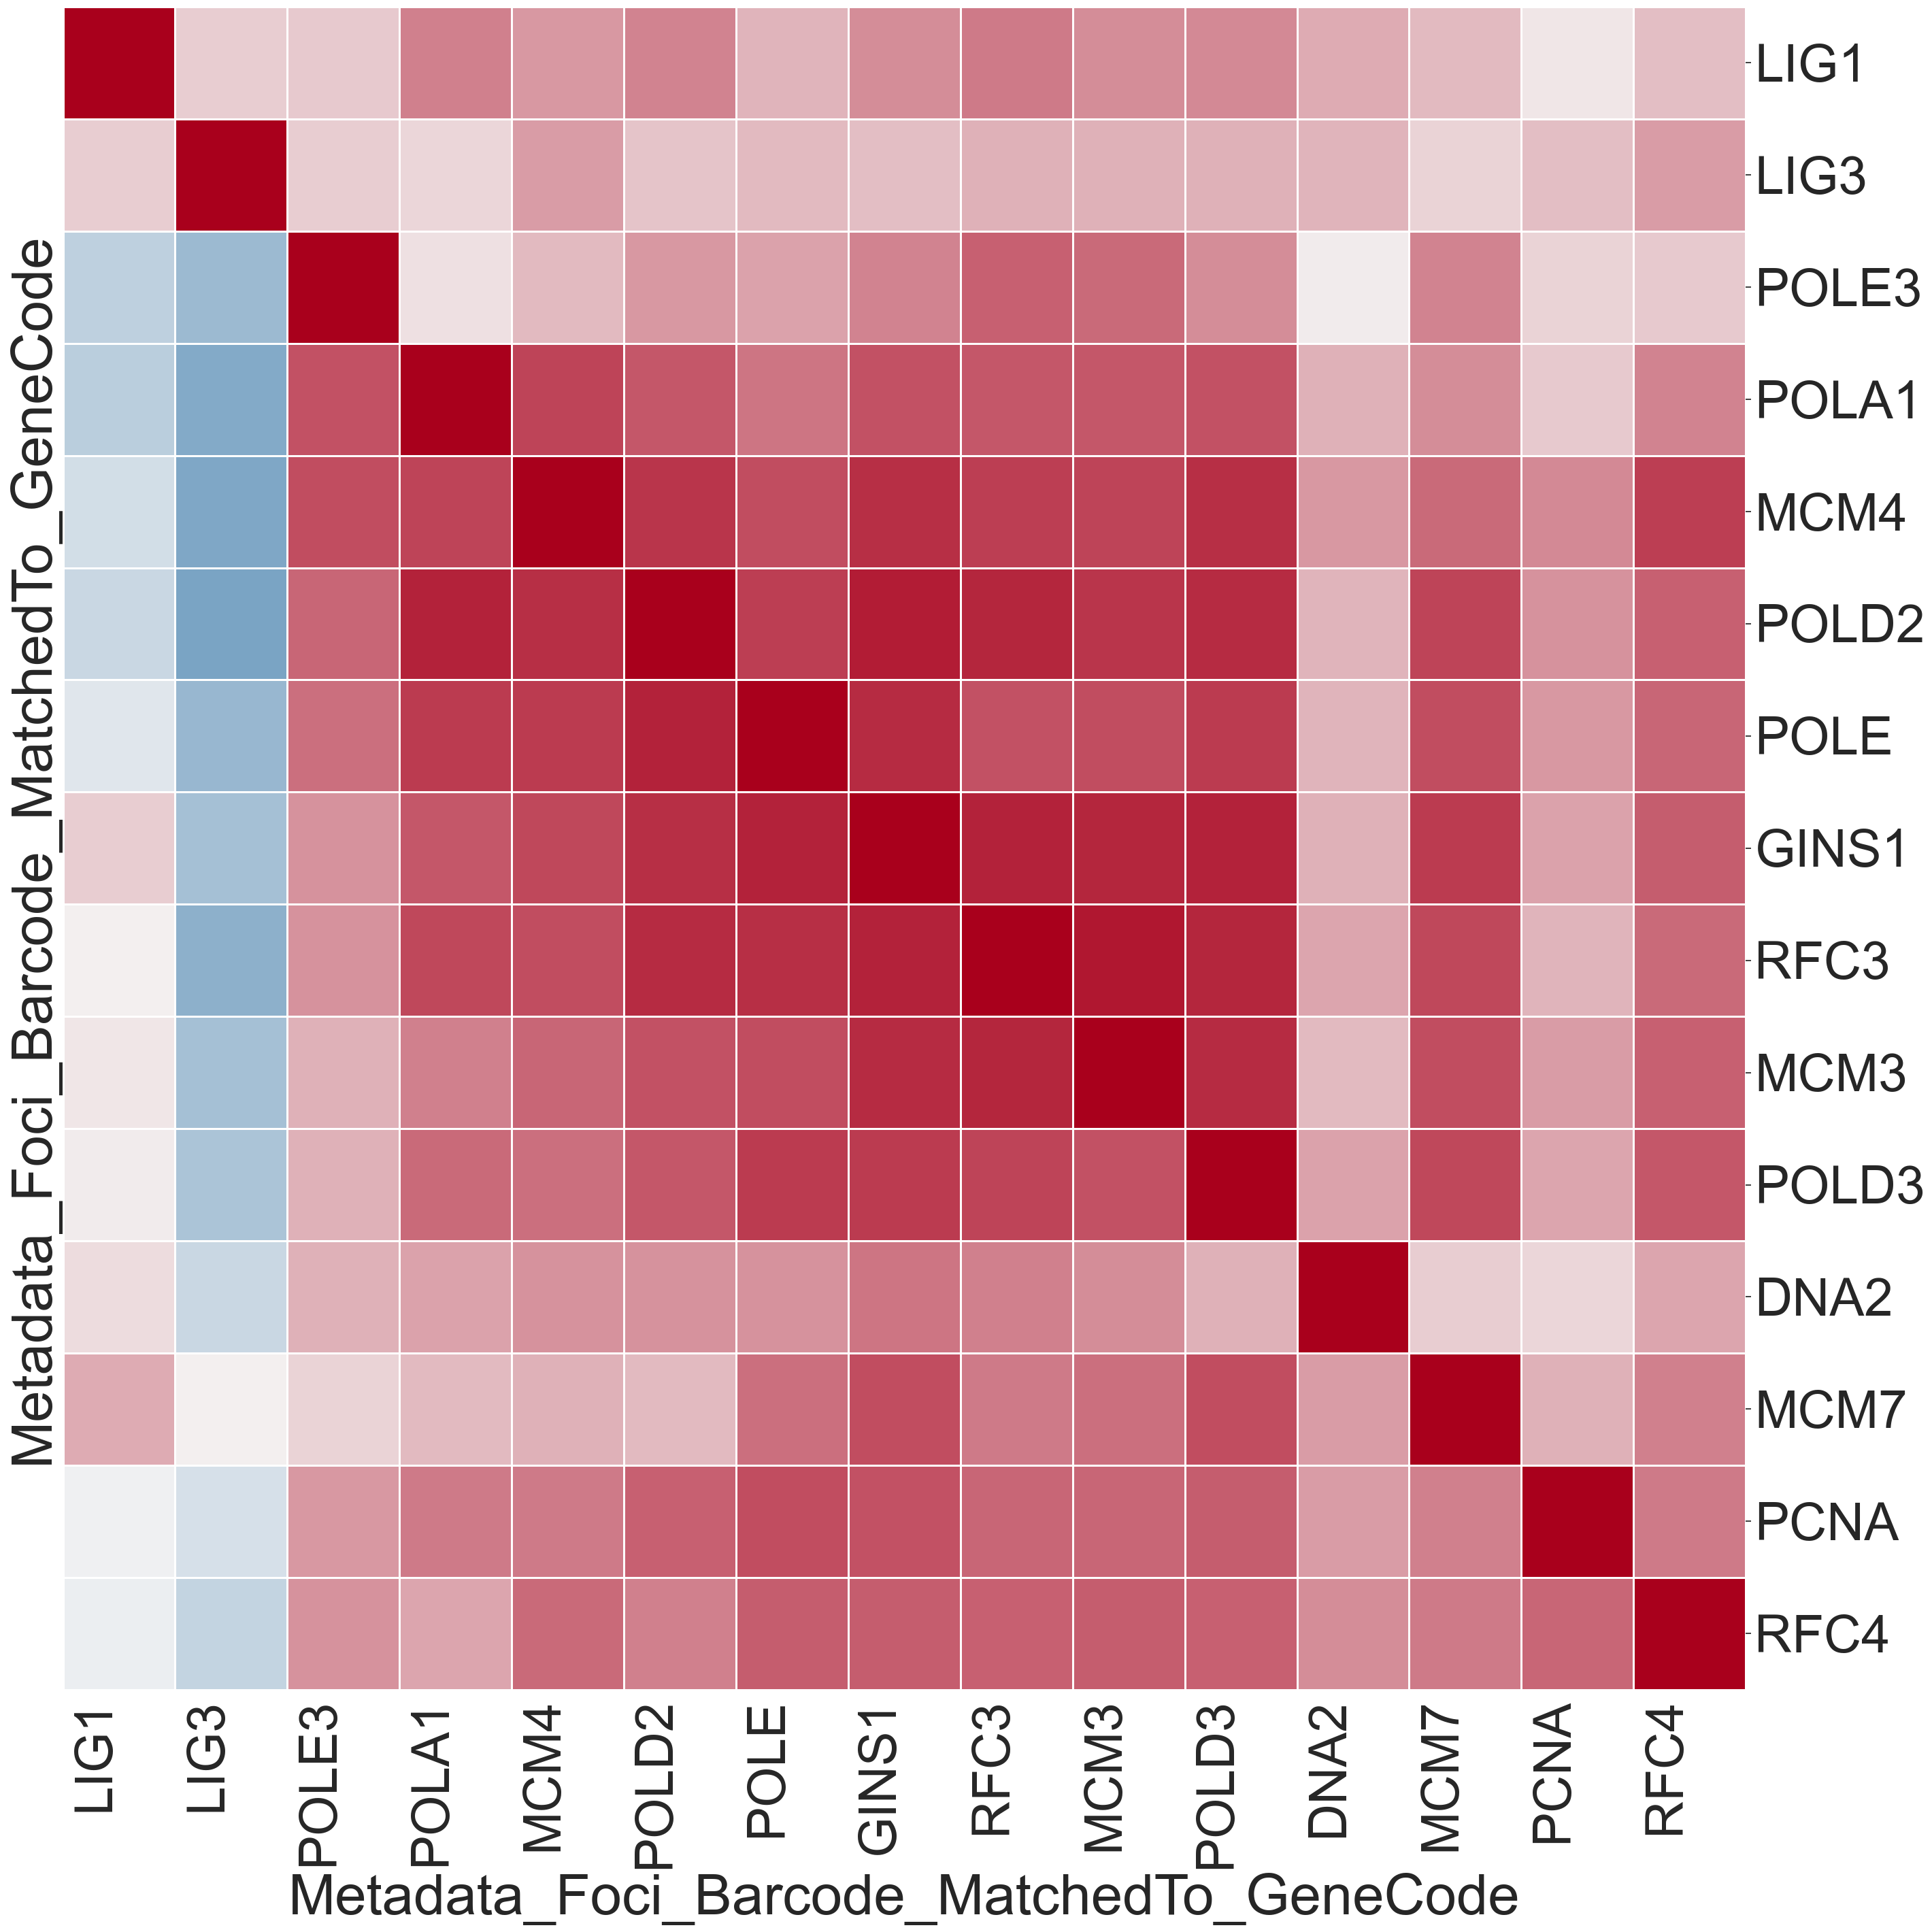

In [17]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_DNA_STRAND_ELONGATION_INVOLVED_IN_DNA_REPLICATION_HPLM_cluster'
genes = 'POLD3	DNA2	LIG1	LIG3	MCM3	MCM4	MCM7	PCNA	POLE3	POLA1	POLD2	POLE	RFC3	RFC4	GINS1'
coupled_heatmap(cp257_hplm_df,cp257_dmem_df,gene_set,genes,5)


<Figure size 1000x1000 with 0 Axes>

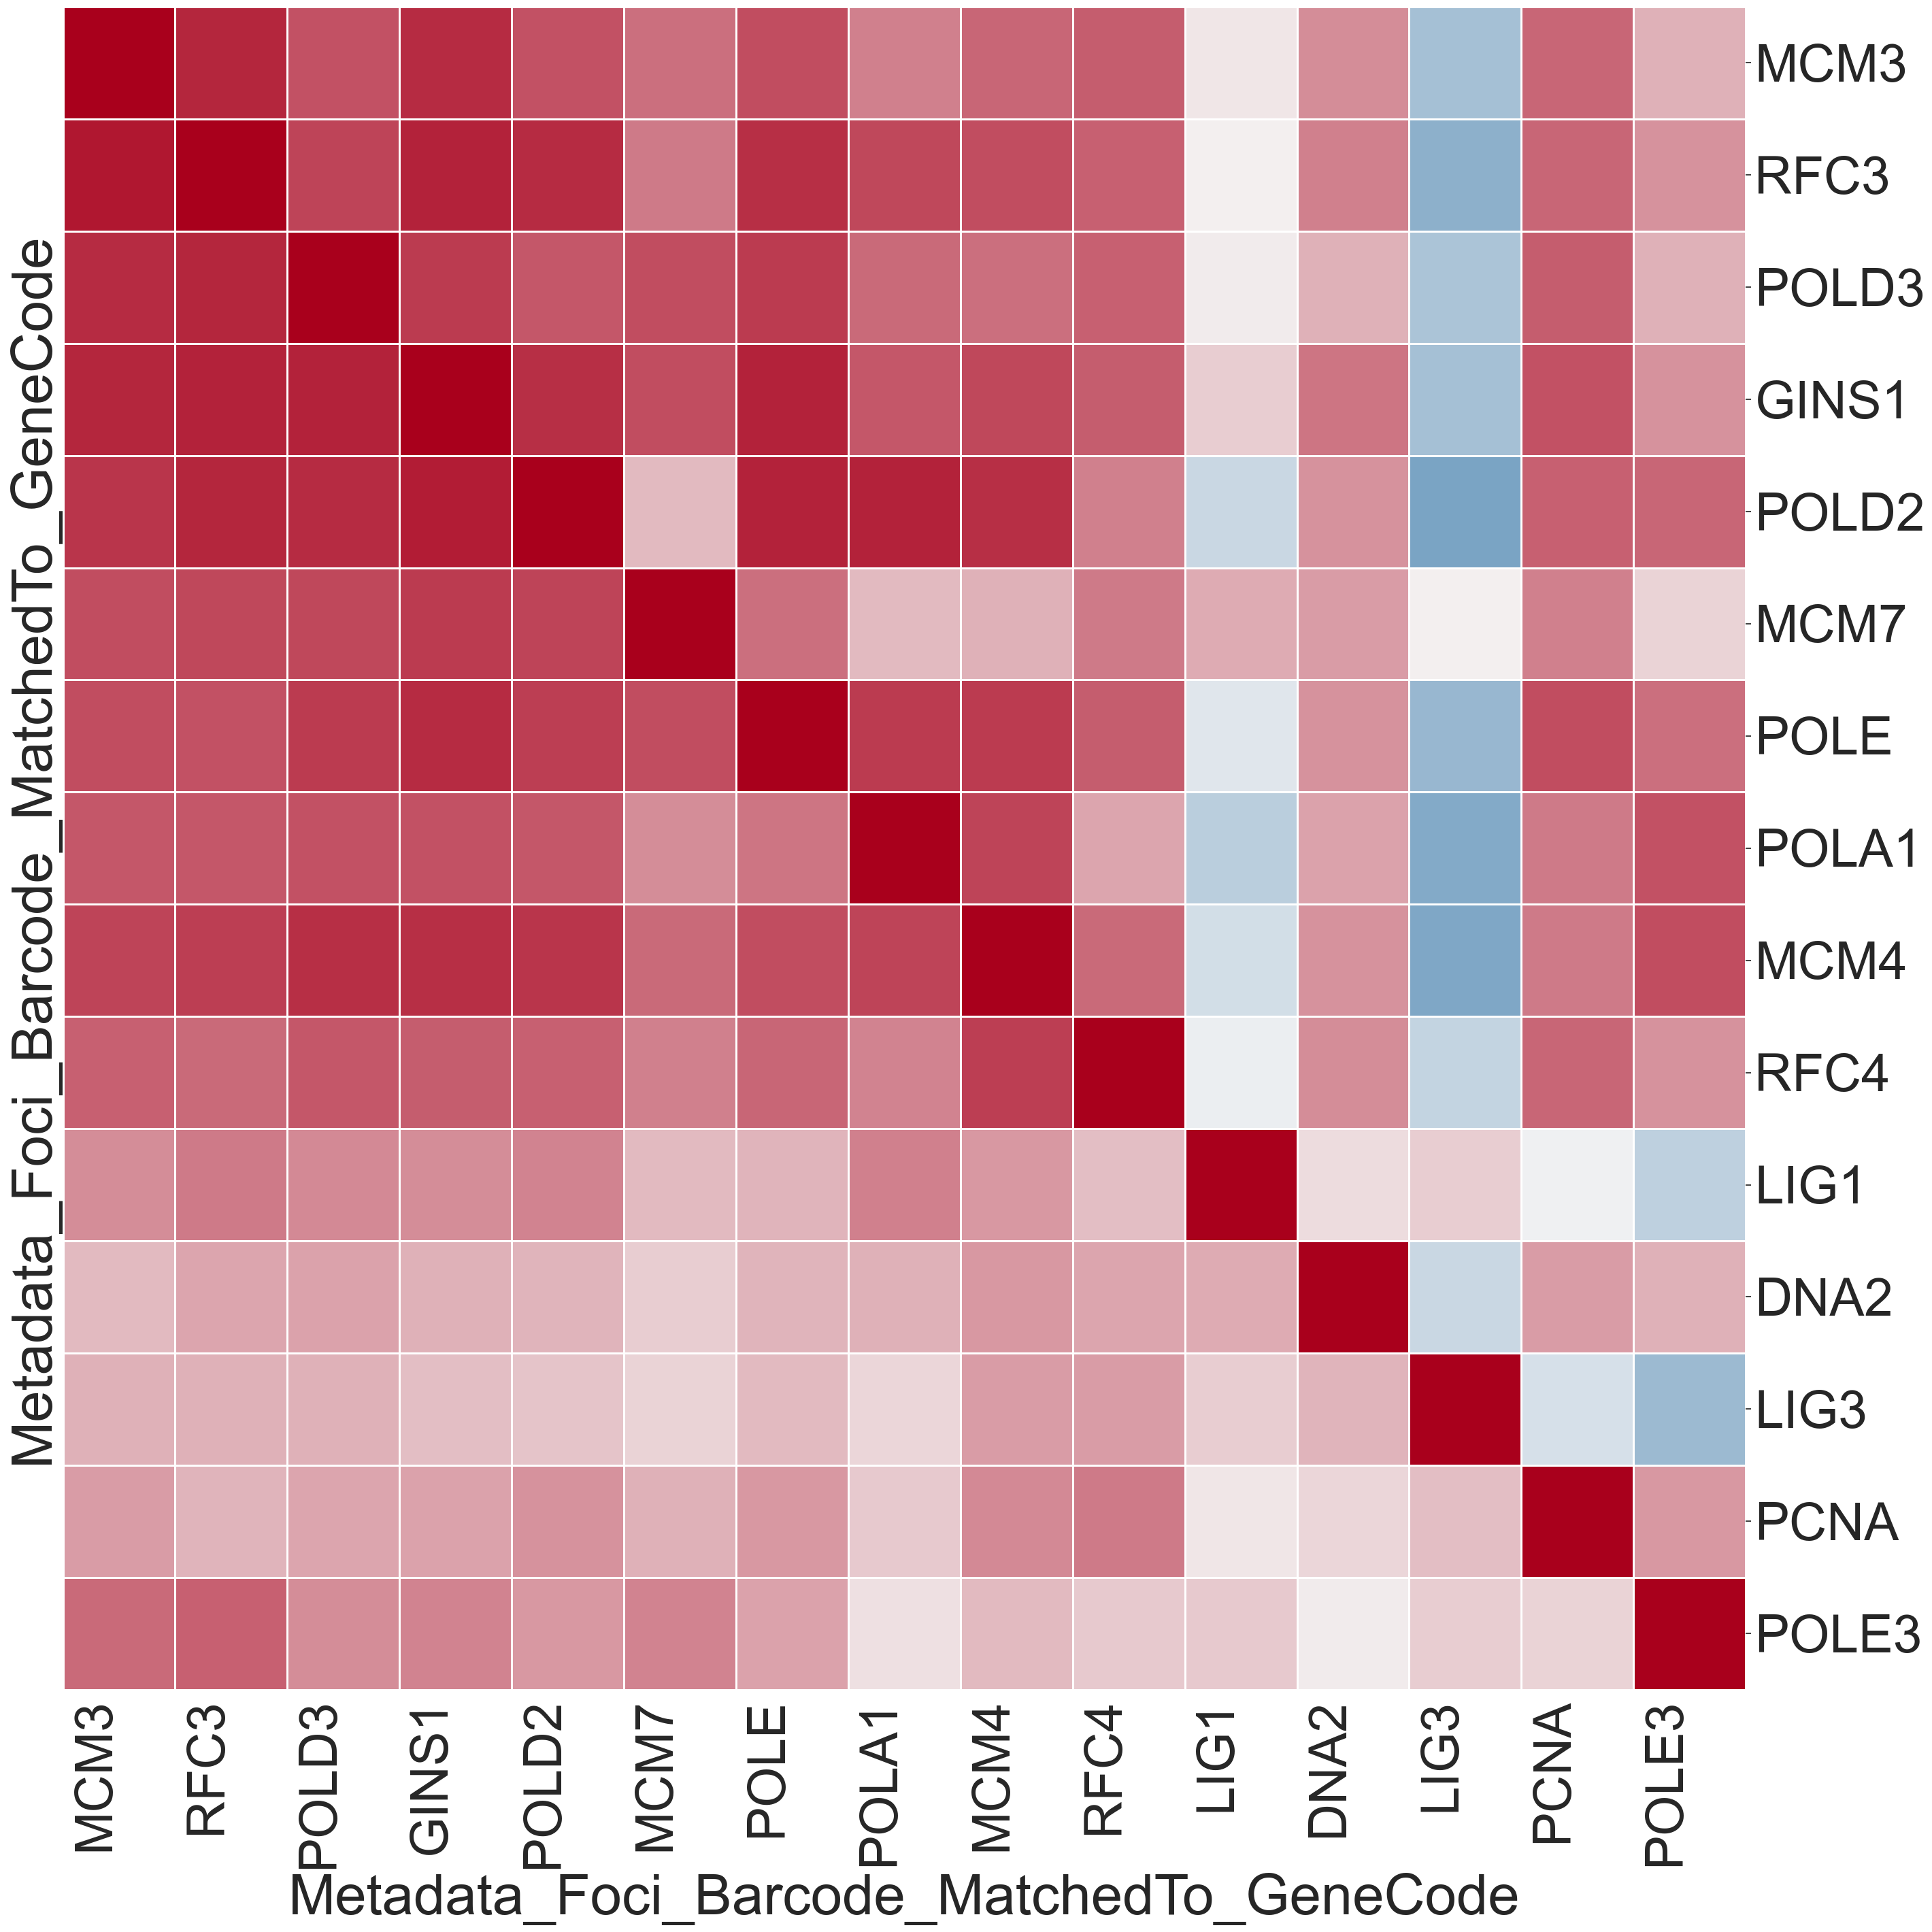

In [16]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_DNA_STRAND_ELONGATION_INVOLVED_IN_DNA_REPLICATION_DMEM_cluster'
genes = 'POLD3	DNA2	LIG1	LIG3	MCM3	MCM4	MCM7	PCNA	POLE3	POLA1	POLD2	POLE	RFC3	RFC4	GINS1'
coupled_heatmap(cp257_dmem_df,cp257_hplm_df,gene_set,genes,5)
